In [1]:
import csv
import time
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
def extractQuestionAndDate():
    df = pd.read_csv("sassema_updated_weekly.csv")

    de = df[["ADHDSx_1","ADHDSx_2","ADHDSx_3","ADHDSx_4","ADHDSx_5","ADHDSx_6","ADHDSx_7","ADHDSx_8","ADHDSx_9","ADHDSx_10","ADHDSx_11","ADHDSx_12","ADHDSx_13","ADHDSx_14","ADHDSx_15","ADHDSx_16","ADHDSx_17","ADHDSx_18","Q317","StartDate"]].copy()
    de.to_csv("weekly_data_for_visualization.csv", index=False)

In [3]:
extractQuestionAndDate()
df = pd.read_csv("weekly_data_for_visualization.csv")

df

#convert date to YYYY-MM-DD format
dates_milli = df["StartDate"].tolist()
date_mili_strip = [i.replace("-", "/") for i in dates_milli]
date_final = [i.split(" ")[0] for i in date_mili_strip]

date_final

converted_dates = []

print(date_final)

# create a list of dates from mili sec
for i in range(0,len(date_final)):  
    if i < 2:
        converted_dates.append(date_final[i])
    else: 
        date_object = datetime.strptime(date_final[i], '%m/%d/%Y')
        converted_dates.append(date_object)

df["Final Date"] = converted_dates  # new conlumn of dates only, new table with "Final Date" Created

ids = df["Q317"].unique() #change to “Userid"

# for. each id sort values by final date in ascending order
df = df.sort_values(by=['Q317','Final Date'],ascending=[True,True])

df.to_csv("weekly_data_for_visualization.csv") #new updated_weekly data with "Final Date" at the end of it

print(df["Final Date"])

ids=ids[2:] #only keeping the numbers of ids

print(ids)

dayDict={}

for id in ids:
    #calculate the difference between the two adjacent datetimes

    dates = df.loc[df["Q317"]==id, 'Final Date']     

    #increment the corresponding difference #days by 1
        #adding to a list to verify (tmp)

    tmp =[]

    for date in dates:
        tmp.append(date)

    for i in range(1,len(tmp)):
        numDays = tmp[i] - tmp[i-1]
        index = str(numDays)
        key = index.split(" ")[0]
        key = int(key)
        if key not in dayDict:
            dayDict[key] = 1
        else:
            dayDict[key] += 1
        
# print(tmp)
myKeys = list(dayDict.keys())
myKeys.sort()
dayDict = {i: dayDict[i] for i in myKeys}
print(dayDict)


['Start', '{"ImportId":"startDate","timeZone":"America/New_York"}', '4/15/2022', '4/17/2022', '4/21/2022', '4/22/2022', '4/22/2022', '4/22/2022', '4/24/2022', '4/28/2022', '4/29/2022', '4/29/2022', '5/1/2022', '5/5/2022', '5/6/2022', '5/6/2022', '5/8/2022', '5/12/2022', '5/13/2022', '5/6/2022', '5/15/2022', '5/19/2022', '5/20/2022', '5/20/2022', '5/20/2022', '5/22/2022', '5/26/2022', '5/27/2022', '5/28/2022', '5/29/2022', '6/2/2022', '6/3/2022', '6/3/2022', '6/5/2022', '6/9/2022', '6/10/2022', '6/10/2022', '6/12/2022', '6/17/2022', '6/19/2022', '6/23/2022', '6/24/2022', '10/26/2022', '10/31/2022', '11/1/2022', '11/1/2022', '11/2/2022', '11/3/2022', '11/7/2022', '11/8/2022', '11/10/2022', '11/11/2022', '11/14/2022', '11/15/2022', '11/16/2022', '11/17/2022', '11/21/2022', '11/22/2022', '11/22/2022', '11/23/2022', '11/24/2022', '11/27/2022', '11/28/2022', '11/29/2022', '11/29/2022', '11/30/2022', '12/1/2022', '12/1/2022', '12/5/2022', '12/6/2022', '12/6/2022', '12/7/2022', '12/8/2022', '1

In [4]:
df

,ADHDSx_1,ADHDSx_2,ADHDSx_3,ADHDSx_4,ADHDSx_5,ADHDSx_6,ADHDSx_7,ADHDSx_8,ADHDSx_9,ADHDSx_10,...,ADHDSx_12,ADHDSx_13,ADHDSx_14,ADHDSx_15,ADHDSx_16,ADHDSx_17,ADHDSx_18,Q317,StartDate,Final Date
132,Never or rarely,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Never or rarely,Often,Sometimes,Never or rarely,...,Never or rarely,Sometimes,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,117639,3/9/2023 15:34,2023-03-09 00:00:00
112,Often,Sometimes,Never or rarely,Never or rarely,Often,Very often,Often,Sometimes,Often,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,2/20/2023 18:26,2023-02-20 00:00:00
114,Sometimes,Sometimes,Often,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,2/27/2023 17:32,2023-02-27 00:00:00
122,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Very often,Often,Often,Sometimes,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,3/6/2023 17:30,2023-03-06 00:00:00
135,Sometimes,Often,Sometimes,Sometimes,Often,Very often,Sometimes,Often,Sometimes,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,3/13/2023 18:30,2023-03-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Very often,Very often,Very often,Sometimes,Sometimes,Very often,Often,Very often,Very often,Very often,...,Very often,Often,Sometimes,Often,Very often,Often,Often,953571,6/3/2022 15:16,2022-06-03 00:00:00
36,Very often,Often,Very often,Very often,Very often,Very often,Often,Very often,Very often,Very often,...,Often,Very often,Often,Very often,Very often,Very often,Very often,953571,6/10/2022 20:23,2022-06-10 00:00:00
38,Very often,Often,Very often,Often,Sometimes,Very often,Very often,Very often,Very often,Often,...,Often,Sometimes,Often,Sometimes,Very often,Very often,Often,953571,6/17/2022 15:26,2022-06-17 00:00:00
0,Fail to give close attention to details or mak...,Difficulty sustaining my attention in tasks or...,Don’t listen when spoken to directly.,Don’t follow through on instructions and fail ...,Have difficulty organizing tasks and activities.,"Avoid, dislike, or am reluctant to engage in t...",Lose things necessary for tasks or activities.,Easily distracted by extraneous stimuli or irr...,Forgetful in daily activities.,Fidget with hands or feet or squirm in seat.,...,Shift around excessively or feel restless or h...,Have difficulty engaging in leisure activities...,I am “on the go” or act as if “driven by a mot...,Talk excessively (in social situations).,Blurt out answers before questions have been c...,Have difficulty awaiting my turn.,Interrupt or intrude on others (butt into conv...,Please enter your email address.,Start Date,Start


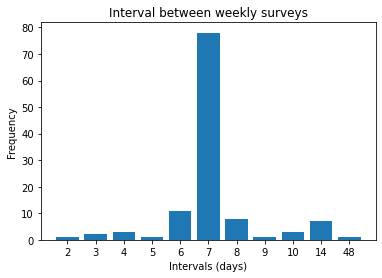

In [5]:
#plot the histogram
interval_int = list(dayDict.keys())
interval = []
for i in interval_int:
    interval.append(str(i))
num = list(dayDict.values())

plt.bar(interval, num)
plt.title("Interval between weekly surveys")
plt.xlabel("Intervals (days)")
plt.ylabel("Frequency")
plt.show()

In [6]:
converted_dates = df["Final Date"].tolist()
# str(converted_dates[3])
str(converted_dates[3])    

'2023-03-06 00:00:00'

In [7]:
stringConvertedDates = []
for i in range(len(converted_dates)):
    stringSurvey = str(converted_dates[i])
    stringSurvey = stringSurvey.split(" ")[0]
    stringSurvey = "'" + stringSurvey
    stringSurvey = stringSurvey + "'"
#     print(stringSurvey)
    stringConvertedDates.append(stringSurvey)

# stringConvertedDates
df["String Final Date"] = stringConvertedDates  

ids = df["Q317"].unique() #change to “Userid"

# for. each id sort values by final date in ascending order
df = df.sort_values(by=['Q317','Final Date'],ascending=[True,True])
df.to_csv("weekly_data_for_visualization.csv") 

In [8]:
df

,ADHDSx_1,ADHDSx_2,ADHDSx_3,ADHDSx_4,ADHDSx_5,ADHDSx_6,ADHDSx_7,ADHDSx_8,ADHDSx_9,ADHDSx_10,...,ADHDSx_13,ADHDSx_14,ADHDSx_15,ADHDSx_16,ADHDSx_17,ADHDSx_18,Q317,StartDate,Final Date,String Final Date
132,Never or rarely,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Never or rarely,Often,Sometimes,Never or rarely,...,Sometimes,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,117639,3/9/2023 15:34,2023-03-09 00:00:00,'2023-03-09'
112,Often,Sometimes,Never or rarely,Never or rarely,Often,Very often,Often,Sometimes,Often,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,2/20/2023 18:26,2023-02-20 00:00:00,'2023-02-20'
114,Sometimes,Sometimes,Often,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,2/27/2023 17:32,2023-02-27 00:00:00,'2023-02-27'
122,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Very often,Often,Often,Sometimes,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,3/6/2023 17:30,2023-03-06 00:00:00,'2023-03-06'
135,Sometimes,Often,Sometimes,Sometimes,Often,Very often,Sometimes,Often,Sometimes,Never or rarely,...,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,144932,3/13/2023 18:30,2023-03-13 00:00:00,'2023-03-13'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Very often,Very often,Very often,Sometimes,Sometimes,Very often,Often,Very often,Very often,Very often,...,Often,Sometimes,Often,Very often,Often,Often,953571,6/3/2022 15:16,2022-06-03 00:00:00,'2022-06-03'
36,Very often,Often,Very often,Very often,Very often,Very often,Often,Very often,Very often,Very often,...,Very often,Often,Very often,Very often,Very often,Very often,953571,6/10/2022 20:23,2022-06-10 00:00:00,'2022-06-10'
38,Very often,Often,Very often,Often,Sometimes,Very often,Very often,Very often,Very often,Often,...,Sometimes,Often,Sometimes,Very often,Very often,Often,953571,6/17/2022 15:26,2022-06-17 00:00:00,'2022-06-17'
0,Fail to give close attention to details or mak...,Difficulty sustaining my attention in tasks or...,Don’t listen when spoken to directly.,Don’t follow through on instructions and fail ...,Have difficulty organizing tasks and activities.,"Avoid, dislike, or am reluctant to engage in t...",Lose things necessary for tasks or activities.,Easily distracted by extraneous stimuli or irr...,Forgetful in daily activities.,Fidget with hands or feet or squirm in seat.,...,Have difficulty engaging in leisure activities...,I am “on the go” or act as if “driven by a mot...,Talk excessively (in social situations).,Blurt out answers before questions have been c...,Have difficulty awaiting my turn.,Interrupt or intrude on others (butt into conv...,Please enter your email address.,Start Date,Start,'Start'
